In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']



In [24]:
input_file = '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-Item数据-original.csv'
df = pd.read_csv(input_file)


In [65]:
df.describe()  # 查看数值型列的统计信息


,suicide,Gender,EduBG,major,Post,WorkingS,ProfessionalRT,Yincome,AFECQ1,MaritalS,...,CSDMHS33,CSDMHS34,CSDMHS35,CSDMHS36,CSDMHS37,CSDMHS38,BMI,WorkTime,depression,anxiety
count,12213.000000,12397.000000,12396.000000,12315.000000,12365.000000,11863.000000,12357.000000,1.139800e+04,12263.000000,12315.000000,...,12437.000000,12623.000000,12555.000000,12553.000000,12548.000000,12489.000000,11800.000000,12510.000000,13284.000000,13284.000000
mean,3.801359,1.458175,4.378913,2.914495,1.566923,12.297480,2.901756,9.650816e+22,1.676996,1.858628,...,2.048886,3.851066,2.833373,2.465227,1.690867,1.694851,18.857966,48.297082,6.440982,4.292909
std,0.627601,0.498268,0.990200,1.620704,0.757357,9.271833,1.247293,1.030335e+25,0.467643,0.568863,...,0.712673,1.123636,0.781406,1.286205,0.462155,0.460489,3.024716,15.564703,4.071731,3.889803
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,4.000000,2.000000,1.000000,5.000000,2.000000,5.285375e+04,1.000000,2.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,17.000000,40.000000,4.000000,1.000000
50%,4.000000,1.000000,4.000000,2.000000,1.000000,10.000000,3.000000,7.700000e+04,2.000000,2.000000,...,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,19.000000,46.000000,6.000000,4.000000
75%,4.000000,2.000000,5.000000,4.000000,2.000000,18.000000,4.000000,1.140000e+05,2.000000,2.000000,...,3.000000,5.000000,3.000000,4.000000,2.000000,2.000000,21.000000,56.000000,9.000000,7.000000
max,4.000000,2.000000,6.000000,6.000000,4.000000,51.000000,6.000000,1.100000e+27,2.000000,5.000000,...,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,36.000000,168.000000,27.000000,21.000000


In [25]:
Q1 = df['Yincome'].quantile(0.1)
Q3 = df['Yincome'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)
print("Q3=" + str(Q3))
print("Q1=" + str(Q1))

print(Q3 + 3 *IQR)
filter = (df['Yincome'] >= Q1) & (df['Yincome'] <= Q3 + 3 *IQR)
df = df.loc[filter] 

126793.5
Q3=164000.0
Q1=37206.5
544380.5


In [3]:
df['SMOKING3'] = df['SMOKING3'].fillna(0)
df['NumberCH'] = df['NumberCH'].fillna(0)

for column in df.columns:
    # 找到列的众数
    mode = df[column].mode().iloc[0]
    
    # 用众数填充空值
    df[column].fillna(mode, inplace=True)

In [68]:
df.to_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-Item数据-过滤Yincome异常值 .csv',index=False)



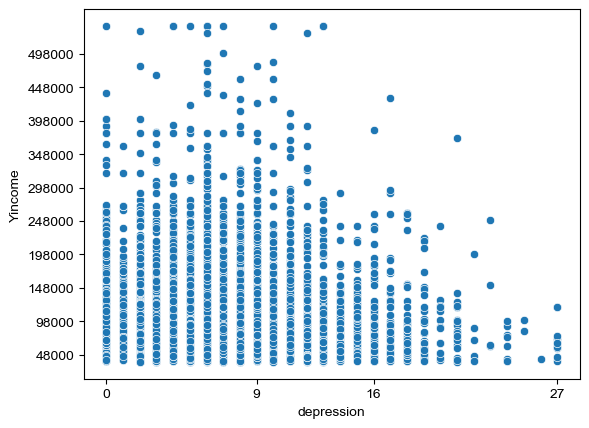

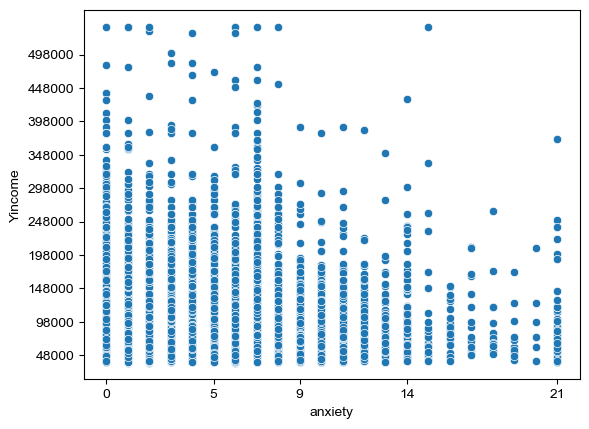

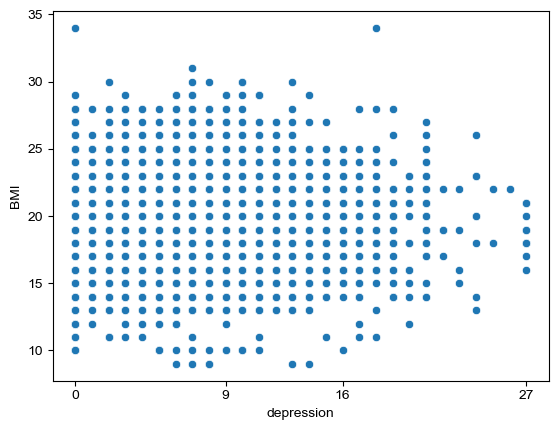

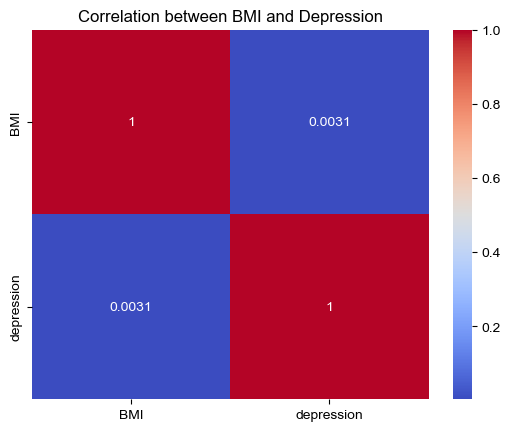

In [29]:
ax = sns.scatterplot(x='depression', y='Yincome', data=df)
Q1 = df['Yincome'].quantile(0.1)
Q3 = df['Yincome'].quantile(0.9)
IQR = Q3 - Q1
yticks = np.arange(Q1, Q3 + 3 *IQR, 50000)  # 使用numpy的arange函数，设定起始值、结束值和步长
ax.set_yticks(yticks) 
xticks = [0, 9, 16, 27]  # 设置你想要的刻度
ax.set_xticks(xticks)  # 应用自定义的刻度

plt.show()
ax = sns.scatterplot(x='anxiety', y='Yincome', data=df)
yticks = np.arange(Q1, Q3 + 3 *IQR, 50000)  # 使用numpy的arange函数，设定起始值、结束值和步长
ax.set_yticks(yticks) 
xticks = [0, 5, 9, 14,21]  # 设置你想要的刻度
ax.set_xticks(xticks)  # 应用自定义的刻度

plt.show()

ax = sns.scatterplot(x='depression', y='BMI', data=df)
# yticks = np.arange(Q1, Q3 + 3 *IQR, 50000)  # 使用numpy的arange函数，设定起始值、结束值和步长
# ax.set_yticks(yticks) 
xticks = [0, 9, 16, 27]  # 设置你想要的刻度
ax.set_xticks(xticks)  # 应用自定义的刻度

plt.show()
corr_matrix = df[['BMI', 'depression']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between BMI and Depression')
plt.show()

[2. 1.]


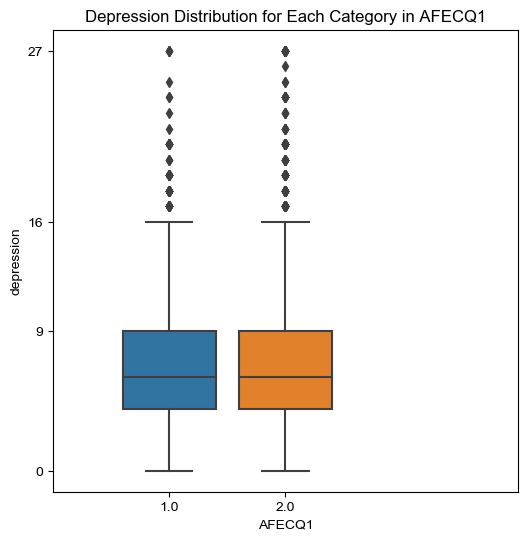

2.0    207
1.0     78
Name: AFECQ1, dtype: int64


In [20]:
print(df['AFECQ1'].unique())
plt.figure(figsize=(6, 6))  # 调整图表的大小
ax = sns.boxplot(x='AFECQ1', y='depression', data=df)
plt.xlim(-1, 3)  # 增加x轴的范围
yticks = [0, 9, 16, 27]  # 设置你想要的刻度
ax.set_yticks(yticks)  # 应用自定义的刻度
plt.title('Depression Distribution for Each Category in AFECQ1')

plt.show()
df_depression_gt_16 = df[df['depression'] > 16]

# 然后，计算这部分数据中'AFECQ1'为1和为2的数量
counts = df_depression_gt_16['AFECQ1'].value_counts()

# 打印结果
print(counts)


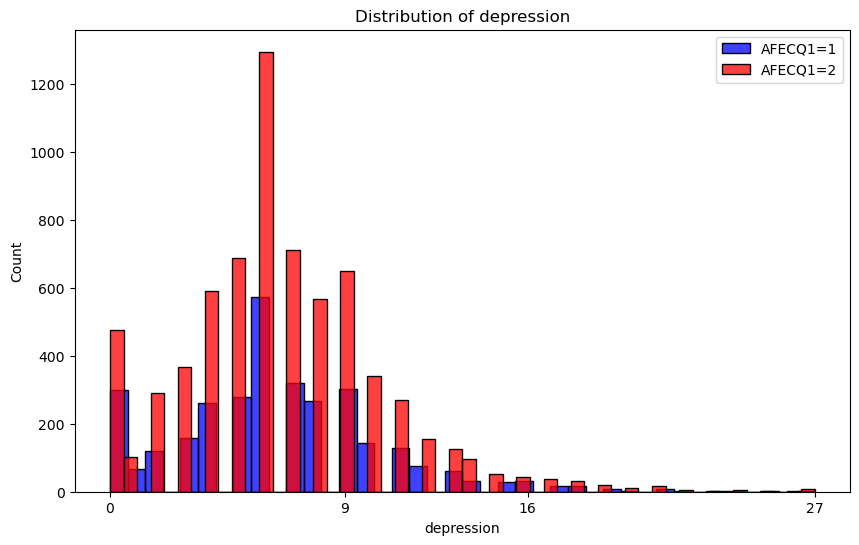

In [84]:

# 创建一个新的figure
plt.figure(figsize=(10, 6))

# 为"AFECQ1"为1和为2的情况分别创建直方图
sns.histplot(df[df['AFECQ1'] == 1]['depression'], kde=False, label='AFECQ1=1', color='blue')
sns.histplot(df[df['AFECQ1'] == 2]['depression'], kde=False, label='AFECQ1=2', color='red')
plt.xticks([0, 9, 16, 27])
# 添加图例和标题
plt.legend()
plt.title('Distribution of depression ')

# 显示图形
plt.show()


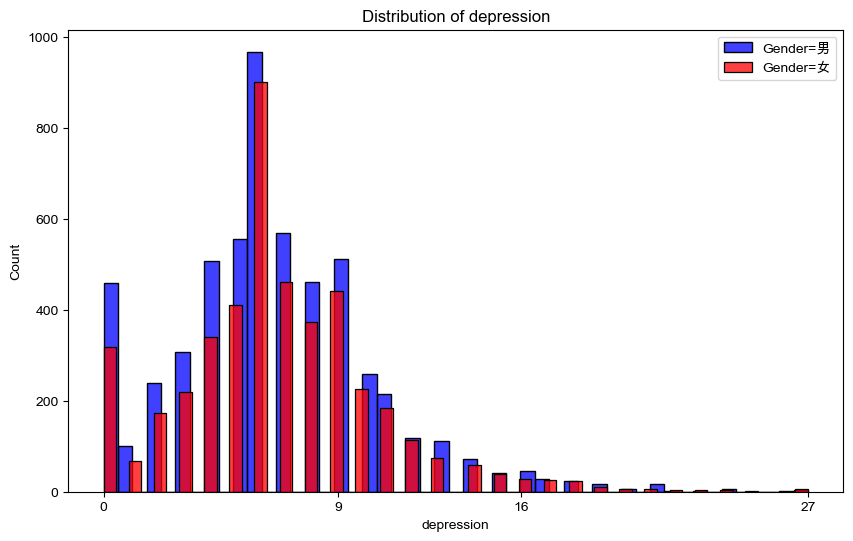

In [88]:

# 创建一个新的figure
plt.figure(figsize=(10, 6))

# 为"AFECQ1"为1和为2的情况分别创建直方图
sns.histplot(df[df['Gender'] == 1]['depression'], kde=False, label='Gender=男', color='blue')
sns.histplot(df[df['Gender'] == 2]['depression'], kde=False, label='Gender=女', color='red')
plt.xticks([0, 9, 16, 27])
# 添加图例和标题
plt.legend()
plt.title('Distribution of depression by gender')

# 显示图形
plt.show()


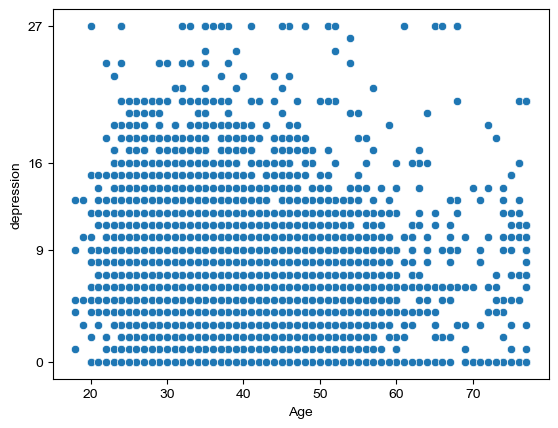

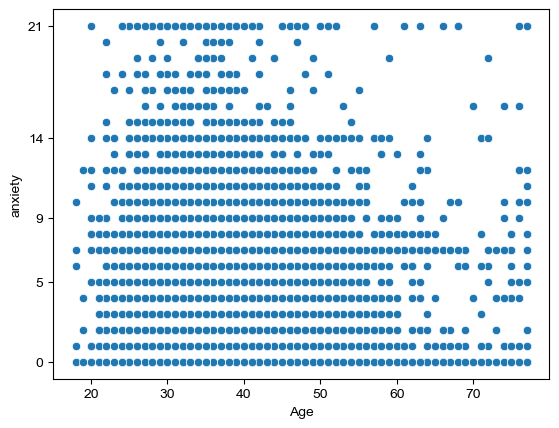

In [18]:
ax = sns.scatterplot(x='Age', y='depression', data=df)
# yticks = np.arange(Q1, Q3 + 3 *IQR, 50000)  # 使用numpy的arange函数，设定起始值、结束值和步长
# ax.set_yticks(yticks) 
yticks = [0, 9, 16, 27]  # 设置你想要的刻度
ax.set_yticks(yticks)  # 应用自定义的刻度

plt.show()
ax = sns.scatterplot(x='Age', y='anxiety', data=df)

# ax = sns.scatterplot(x='anxiety', y='Age', data=df)
# yticks = np.arange(Q1, Q3 + 3 *IQR, 50000)  # 使用numpy的arange函数，设定起始值、结束值和步长
# ax.set_yticks(yticks) 
yticks = [0, 5, 9, 14,21]  # 设置你想要的刻度
ax.set_yticks(yticks)  # 应用自定义的刻度

plt.show()